# Computing Mutual Information of Boolean Functions

100%|██████████| 65536/65536 [00:06<00:00, 9619.11it/s] 


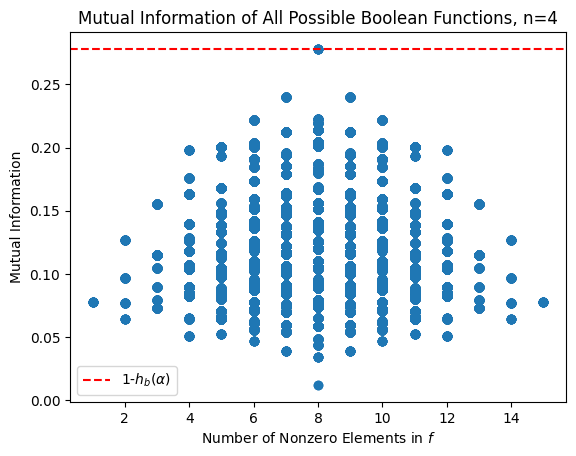

In [ ]:
import numpy as np
from seaborn import heatmap
from matplotlib import pyplot as plt
from tqdm import tqdm
import boolean_mutual_information as lib


def mutual_information(f, alpha):
    # k = 2**n  # Number of possible values of x or y
    n = int(np.log2(len(f)))
    A = lib.make_A(alpha, n)
    beta = np.sum(f) / len(f)
    gamma = A @ f  # p(1, y)
    py = 1 / len(f)  # p(y)
    Hfxy = -np.sum(gamma * np.log2(gamma) + (py - gamma) * np.log2(py - gamma))
    # return n - Hfxy
    return lib.binary_entropy(beta) + n - Hfxy


n = 4
I = []
num = []
hbbeta = []
alpha = 0.2
for i in tqdm(range(2 ** (2**n))):
    f = np.fromiter(np.binary_repr(i), dtype="int")
    f = np.pad(f, (2**n - len(f), 0))
    if np.count_nonzero(f) > 0 and np.count_nonzero(f) < len(f):
        I.append(mutual_information(f, alpha))
        num.append(np.sum(f))

plt.scatter(num, I)
plt.axhline(
    1 - lib.binary_entropy(alpha), linestyle="--", color="red", label="1-$h_b(\\alpha)$"
)
plt.legend()
plt.xlabel("Number of Nonzero Elements in $f$")
plt.ylabel("Mutual Information")
plt.title(f"Mutual Information of All Possible Boolean Functions, n={n}")